Current working directory: /Users/viennacacao/project_collge/sun_pale2/sun_pale/notebooks
Contents of the working directory: ['03_data_preprocessing.ipynb', '01_data_exploration.ipynb', '.DS_Store', '04_model_building_ml.ipynb', '05_model_building_dl.ipynb', '02_data_augmention.ipynb']
/Users/viennacacao/project_collge/sun_pale2/sun_pale/data/raw/labels.csv
              image_id  probability  type
0  images/cell0001.png          1.0  mono
1  images/cell0002.png          1.0  mono
2  images/cell0003.png          1.0  mono
3  images/cell0004.png          0.0  mono
4  images/cell0005.png          1.0  mono
count    2624.000000
mean        0.336890
std         0.435324
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: probability, dtype: float64
poly    1550
mono    1074
Name: type, dtype: int64


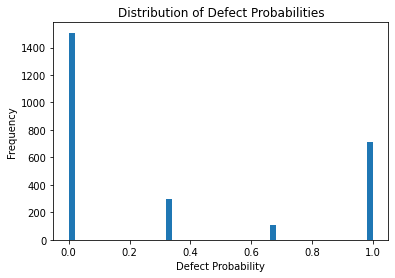

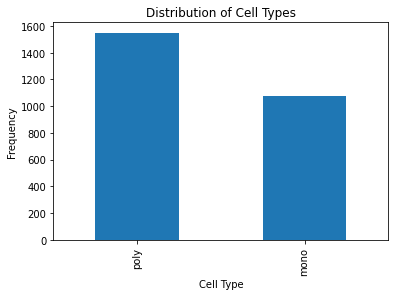

In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import os

# Print the current working directory
print(f"Current working directory: {os.getcwd()}")

# List the contents of the working directory
print(f"Contents of the working directory: {os.listdir('.')}")

# Set the path to the dataset
# dataset_path = '../data/raw/images'
# labels_file = '../data/raw/labels.csv'

# Set the path to the dataset
base_path = os.path.dirname(os.getcwd())  # If notebook is in 'notebooks/' directory, this will return 'project/'
labels_path = os.path.join(base_path, 'data/raw/labels.csv')

# Ensure the path is correct and accessible
assert os.path.isfile(labels_path), f"File not found: {labels_path}"

print(labels_path)
# Load the file and specify column names
labels_df = pd.read_csv(labels_path, names=['image_id', 'probability', 'type'], sep='\s+')

# Display the first few rows of the labels file to understand the data structure
print(labels_df.head())

# Analyze the label distribution
print(labels_df['probability'].describe())

# Analyze the type distribution
print(labels_df['type'].value_counts())

# Visualize the distribution of defect probabilities
plt.hist(labels_df['probability'], bins=50)
plt.title('Distribution of Defect Probabilities')
plt.xlabel('Defect Probability')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of cell types
labels_df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Cell Types')
plt.xlabel('Cell Type')
plt.ylabel('Frequency')
plt.show()


In [2]:
# Set the path to the dataset
base_path = os.path.dirname(os.getcwd())  # If notebook is in 'notebooks/' directory, this will return 'project/'
labels_path = os.path.join(base_path, 'data/raw/labels.csv')

# Ensure the path is correct and accessible
assert os.path.isfile(labels_path), f"File not found: {labels_path}"

# Load the file and specify column names
labels_df = pd.read_csv(labels_path, names=['image_id', 'probability', 'type'], sep='\s+')

# Get the IDs of mono and poly images
mono_ids = labels_df[labels_df['type'] == 'mono']['image_id'].tolist()
poly_ids = labels_df[labels_df['type'] == 'poly']['image_id'].tolist()

# Get the IDs of images with probabilities in the range [0.3, 0.4]
probabilities = labels_df['probability'].tolist()
mono_ids_in_range = [id for id, prob in zip(mono_ids, probabilities) if 0.3 <= prob <= 0.4]
poly_ids_in_range = [id for id, prob in zip(poly_ids, probabilities) if 0.3 <= prob <= 0.4]

# Print the results
print("Mono ids in range:", mono_ids_in_range)
print("Poly ids in range:", poly_ids_in_range)

Mono ids in range: ['images/cell0058.png', 'images/cell0387.png', 'images/cell0393.png', 'images/cell0398.png', 'images/cell0427.png', 'images/cell0434.png', 'images/cell0443.png', 'images/cell0448.png', 'images/cell0449.png', 'images/cell0450.png', 'images/cell0458.png', 'images/cell0461.png', 'images/cell0462.png', 'images/cell0469.png', 'images/cell0476.png', 'images/cell0478.png', 'images/cell0480.png', 'images/cell0483.png', 'images/cell0484.png', 'images/cell0485.png', 'images/cell0486.png', 'images/cell0507.png', 'images/cell0509.png', 'images/cell0510.png', 'images/cell0514.png', 'images/cell0515.png', 'images/cell0516.png', 'images/cell0527.png', 'images/cell0535.png', 'images/cell0538.png', 'images/cell0540.png', 'images/cell0927.png', 'images/cell0930.png', 'images/cell0985.png', 'images/cell0986.png', 'images/cell1200.png', 'images/cell1206.png', 'images/cell1222.png', 'images/cell1257.png', 'images/cell1285.png', 'images/cell1287.png', 'images/cell1288.png', 'images/cell12